In [92]:
import pandas as pd
import warnings
import numpy as np
#for Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split 


In [93]:
df = pd.read_excel(r'/Users/shailendra0408/Desktop/CSA_Temp.xlsx')
print (df.shape)
df

(4469, 2)


,Temperature,Relative Humidity
0,12.7,92
1,12.7,92
2,12.7,91
3,13.0,91
4,13.2,89
...,...,...
4464,21.5,70
4465,21.6,69
4466,21.8,69
4467,21.1,73


In [94]:
data_array = np.array(df)
print(data_array)
print(df.head())

[[12.7 92. ]
 [12.7 92. ]
 [12.7 91. ]
 ...
 [21.8 69. ]
 [21.1 73. ]
 [20.4 75. ]]
   Temperature  Relative Humidity
0         12.7                 92
1         12.7                 92
2         12.7                 91
3         13.0                 91
4         13.2                 89


In [95]:
X,y = data_array[:,0], data_array[:,1]
X = X.reshape(-1,1)
y = y.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_train,y_train))
print(f"intercept: {lin_reg.intercept_}")
print(f"coefficients: {lin_reg.coef_}")


0.6766636621549346
intercept: [131.66075878]
coefficients: [[-3.11896529]]


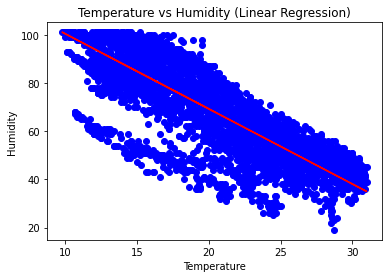

In [96]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='blue')
    plt.plot(X, lin_reg.predict(X), color='red')
    plt.title('Temperature vs Humidity (Linear Regression)')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.show()
    return
viz_linear()

In [123]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

print(pol_reg.score(X_poly,y_train))
print(f"intercept: {pol_reg.intercept_}")
print(f"coefficients: {pol_reg.coef_}")


0.6987970890579625
intercept: [2447.02343857]
coefficients: [[ 0.00000000e+00 -7.73819751e+02  1.02244372e+02 -6.94444779e+00
   2.55811475e-01 -4.86864125e-03  3.75721133e-05]]


In [128]:
X_poly_test = poly_reg.fit_transform(X_test)
print(pol_reg.score(X_poly_test,y_test))
print(f"intercept: {pol_reg.intercept_}")
print(f"coefficients: {pol_reg.coef_}")

0.7166810575518016
intercept: [2447.02343857]
coefficients: [[ 0.00000000e+00 -7.73819751e+02  1.02244372e+02 -6.94444779e+00
   2.55811475e-01 -4.86864125e-03  3.75721133e-05]]


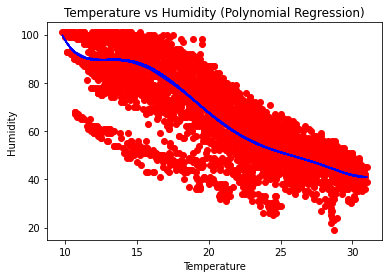

In [129]:
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Temperature vs Humidity (Polynomial Regression)')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.show()
    return
viz_polymonial()

In [132]:
lin_reg.predict([[33]])



array([[28.73490415]])

In [134]:
pol_reg.predict(poly_reg.fit_transform([[33]]))


array([[51.66588727]])